In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [7]:
from google.colab import files

# Загрузка файла 'change4.csv'
uploaded = files.upload()

Saving change4.csv to change4.csv


In [47]:
# Загрузка данных об обменном курсе
data = pd.read_csv('change4.csv')
data['date'] = pd.to_datetime(data['date'])  # Преобразование столбца "Date" в тип данных DateTime
data.set_index('date', inplace=True)  # Установка столбца "Date" в качестве индекса

In [48]:
data = data[['exchange_rate']]

In [49]:
# Нормализация данных
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [50]:
# Разделение данных на обучающий и тестовый наборы
train_size = int(len(data_normalized) * 0.8)
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

In [51]:
# Функция для создания входных данных и меток
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [52]:
# Задание параметров модели
seq_length = 10  # Длина последовательности
n_features = 1  # Количество признаков (столбцов данных)


In [53]:
# Создание последовательностей для обучения
X_train, y_train = create_sequences(train_data, seq_length)

In [54]:
# Создание и обучение модели LSTM
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(seq_length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
13/13 [==============================] - 2s 7ms/step - loss: 0.1513
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0669
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0094
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0058
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0041
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 8/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 9/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 10/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 11/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 12/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 13/50
13/13 [==============================

In [55]:
# Прогнозирование на тестовом наборе данных
inputs = data_normalized[len(data_normalized)-len(test_data)-seq_length:]
X_test, y_test = create_sequences(inputs, seq_length)
predictions = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [56]:
# Обратная нормализация прогнозов
predictions1 = predictions.reshape(-1, 1)
firsts = scaler.inverse_transform(predictions1)


In [64]:
len(predictions1)

100

In [68]:
train = X_test.reshape(-1, 1)
len(train)

1000

In [66]:
test = y_test.reshape(-1, 1)
len(test)

100

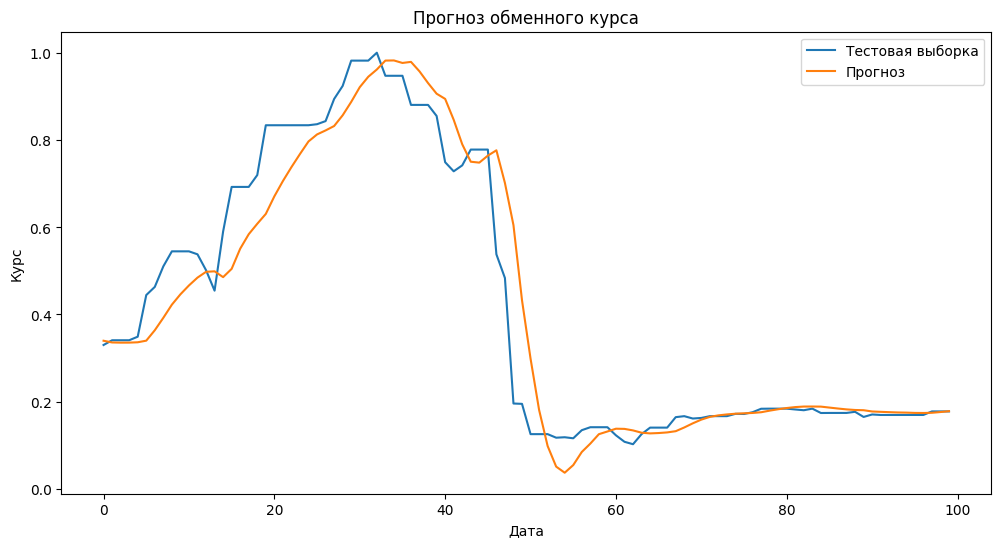

In [70]:
# Построение графика прогноза и фактических значений
import matplotlib.pyplot as plt
# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(test, label='Тестовая выборка')
plt.plot(predictions1, label='Прогноз')
plt.legend(loc='best')
plt.title('Прогноз обменного курса')
plt.xlabel('Дата')
plt.ylabel('Курс')
plt.show()

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(test, predictions1)
mse = mean_squared_error(test, predictions1)
r2= r2_score(test, predictions1)

print("MAE:",mae)
print("MSE:",mse)
print("R2:",r2)

MAE: 0.052992187290761404
MSE: 0.007351040365762958
R2: 0.9228707163178962
